In [1]:
import matplotlib.pyplot as pl

In [2]:
reports = ['v04_Rac1_dominant', 
           'v04_RhoA_dominant',
           'v04_equal_oscillations']
files = ['reports/{}/base/special_basins.txt'.format(r) for r in reports]

In [3]:
def parse_raw_basins(raw):
#     TODO: deal with empty text in first column (repeated from previous)
    
    import re
    lines = raw.split("\n")[1:]    
    names = re.findall('\S+', lines[0])
    basins = []
    values = []    
    for line in lines[1:]:
        if line.startswith(" "):
            # from previous line
            line = cols[0] + line
        cols = re.findall('\S+', line)
        values.append(float(cols[3]))
        a = cols[0]
        b = cols[1]
        max_len = max(len(a), len(b))        
        a = a*max_len
        b = b*max_len
        cycle = []
        for i in range(max_len):
            cycle.append(a[i]+b[i])
        
        basins.append("\n".join(cycle))
        
    return names, basins, values

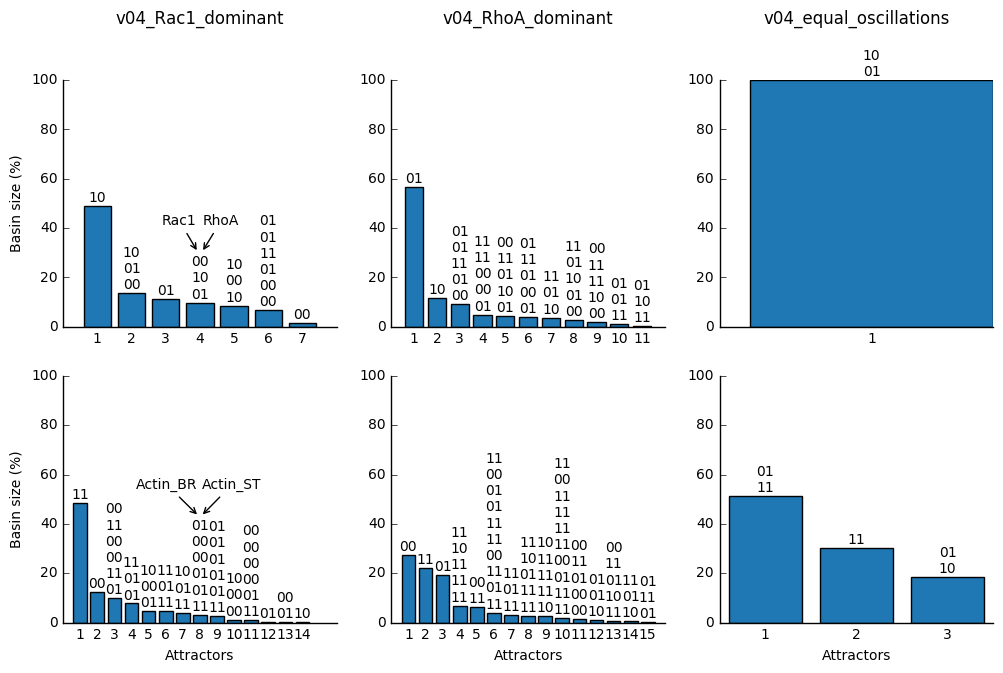

In [21]:
def add_annotation(ax, names, x, y, text_offset=20):
    ax.annotate(names[0], xy=(x-0.05, y), 
            textcoords='offset points',
            xytext=(-1, text_offset), 
            arrowprops=dict(arrowstyle='->'), 
            horizontalalignment='right')
    ax.annotate(names[1], xy=(x + 0.05, y), 
            textcoords='offset points',
            xytext=(1, text_offset), 
            arrowprops=dict(arrowstyle='->'),             
            horizontalalignment='left')


def plot_basins(data, ax, basins, values, labels=None):    
#     labels = range(1, len(values)+1) # [chr(ord('A') + n) for n in range(len(values))]
#     labels = [chr(ord('A') + n) for n in range(len(values))]
    if labels == None:
        labels = range(1, 1+len(values))

    # bar_color = pl.rcParams['axes.color_cycle'][0];
    bar_color = '#1f77b4';

    # pl.title('Rac1 dominant')
#     ax = pl.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('left')
    pl.setp(ax.get_yticklabels(), visible=True)

    ax.bar(range(1, len(values)+1), values, align='center', antialiased=True, edgecolor='black', color=bar_color)
    ax.set_xticks(range(1, len(labels)+1))
    ax.set_xticklabels(labels)

    font = {'weight':'normal',
            'family': 'sans-serif'}
    for idx, basin in enumerate(basins):
        ax.text(idx+1, values[idx] + 0.5, basin, fontdict=font, ha='center', va='bottom')


fig, axes = pl.subplots(2, 3, sharey=True, figsize = (12, 7))
names = []
for idx, file in enumerate(files):
    with open(file, 'r') as file:
        data_a, data_r, _ = file.read().split("\n\n\n\n")
        
    nm, basins, values = parse_raw_basins(data_r)    
    names.append(nm)
    plot_basins(data_r, axes[0, idx], basins, values)   
    axes[0, idx].set_title(reports[idx], y=1.2)
    
    
    
    nm, basins, values = parse_raw_basins(data_a)    
    names.append(nm)
    plot_basins(data_a, axes[1, idx], basins, values)    
    axes[1, idx].set_xlabel('Attractors')

axes[0, 0].set_ylabel('Basin size (%)')
axes[1, 0].set_ylabel('Basin size (%)')
    
add_annotation(axes[0,0], names[0], 4, 30)
add_annotation(axes[1,0], names[1], 8, 43)

fig.savefig('charts/fig_2_a.svg', bbox_inches='tight')
fig.savefig('charts/fig_2_a.eps', bbox_inches='tight')
fig.savefig('charts/fig_2_a.png', bbox_inches='tight', dpi=300)

In [64]:
def transform_basins(basins, values):
    oscillations_label = 'osc'
    basins_t = {'11':0.0, '10':0.0, '01':0.0, '00':0.0, oscillations_label:0.0}
    order = ['11', '10', '01', '00', oscillations_label]

    for basin, value in zip(basins, values):
        if basin in basins_t:
            basins_t[basin] += value
        else:
            basins_t[oscillations_label] += value
    return order, [basins_t[key] for key in order]

transform_basins(['11', '00', '00\n11\n00\n00\n11\n01', '11\n01\n01', '10\n00\n01', '11\n01\n11', '10\n01\n11', '01\n00\n00\n01\n01\n11', '01\n01\n01\n01\n01\n11', '10\n00\n00', '00\n00\n00\n00\n01\n11', '01', '00\n01', '10'],
                 [48.632812, 12.207031, 9.765625, 7.714844, 4.6875, 4.589844, 3.90625, 3.125, 2.539062, 1.171875, 0.878906, 0.292969, 0.292969, 0.195312])

# print(b)
# print(v)

(['11', '10', '01', '00', 'osc'],
 [48.632812, 0.195312, 0.292969, 12.207031, 38.671875])

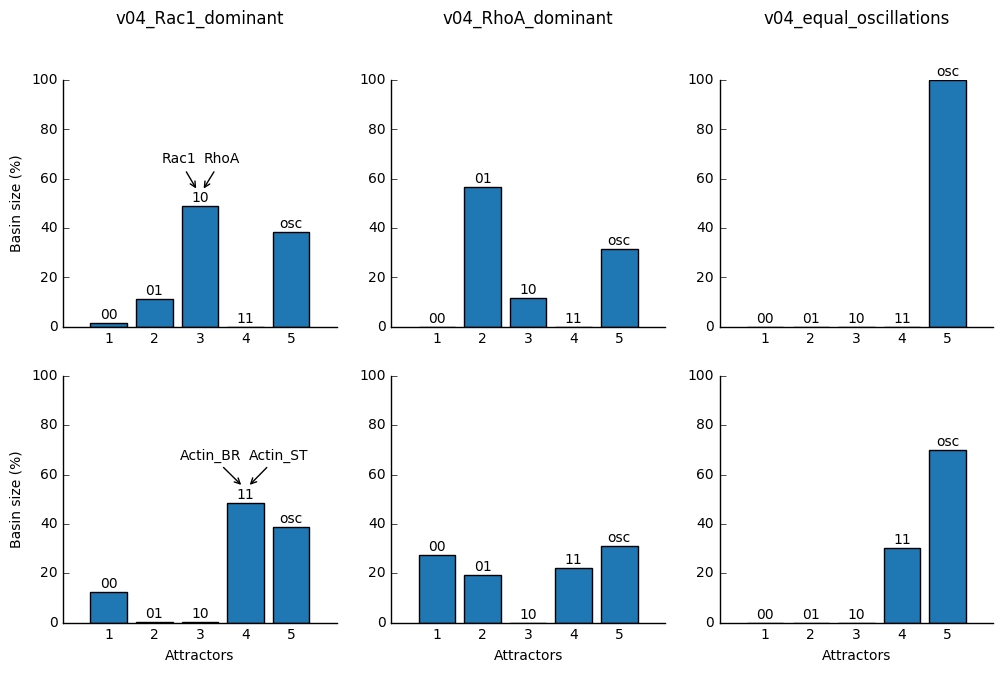

In [11]:
fig, axes = pl.subplots(2, 3, sharey=True, figsize = (12, 7))
names = []
for idx, file in enumerate(files):
    with open(file, 'r') as file:
        data_a, data_r, _ =file.read().split("\n\n\n\n")
        
    nm, basins, values = parse_raw_basins(data_r)    
    names.append(nm)
    bt, vt = transform_basins(basins, values)
    plot_basins(data_r, axes[0, idx], bt, vt)   
    axes[0, idx].set_title(reports[idx], y=1.2)
    
    nm, basins, values = parse_raw_basins(data_a)    
    bt, vt = transform_basins(basins, values)
    names.append(nm)
    plot_basins(data_a, axes[1, idx], bt, vt)
    axes[1, idx].set_xlabel('Attractors')

axes[0, 0].set_ylabel('Basin size (%)')
axes[1, 0].set_ylabel('Basin size (%)')
    
    
add_annotation(axes[0,0], names[0], 3, 55)
add_annotation(axes[1,0], names[1], 4, 55)

fig.savefig('charts/fig_2_b.svg', bbox_inches='tight')
fig.savefig('charts/fig_2_b.eps', bbox_inches='tight')
fig.savefig('charts/fig_2_b.png', bbox_inches='tight', dpi=300)

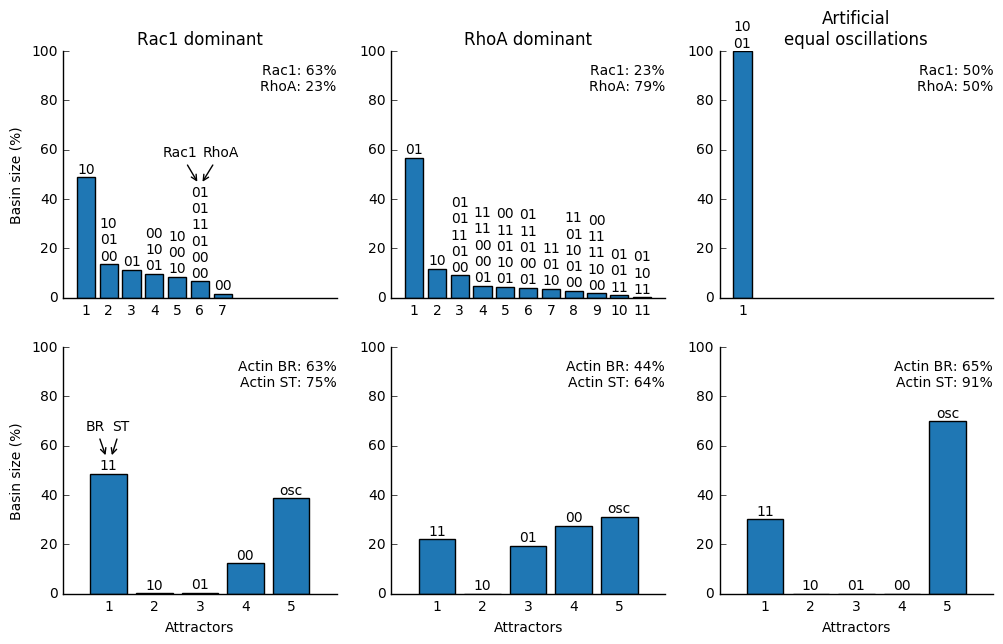

In [114]:
def get_activity(report):
    import csv
    reader = csv.reader(open('reports/{}/base/weighted_activity.csv'.format(report), 'r'))
    act = {}
    for data in reader:        
        act[data[0]] = data[1]
        
    return act

titles = ['Rac1 dominant', 'RhoA dominant', 'Artificial\nequal oscillations']

activities = [get_activity(report) for report in reports]

# titles = [get_title(report) for report in reports] 

fig, axes = pl.subplots(2, 3, sharey=True, figsize = (12, 7))
names = []
for idx, file in enumerate(files):
    with open(file, 'r') as file:
        data_a, data_r, _ = file.read().split("\n\n\n\n")
        
    nm, basins, values = parse_raw_basins(data_r) 
    
    names.append(nm)
    plot_basins(data_r, axes[0, idx], basins, values)   
    axes[0, idx].set_title(titles[idx], y=1.0)
    axes[0, idx].set_xlim((0, 12))
    axes[0, idx].text(12, 95, 
                      'Rac1: {}%\nRhoA: {}%'.format(activities[idx]['Rac1'], activities[idx]['RhoA']), 
                      horizontalalignment='right',
                      verticalalignment='top')
    
    nm, basins, values = parse_raw_basins(data_a)    
    bt, vt = transform_basins(basins, values)
    names.append(nm)
    plot_basins(data_a, axes[1, idx], bt, vt)
    axes[1, idx].set_xlabel('Attractors')
    axes[1, idx].set_xlim((0, 6))
    
    axes[1, idx].text(6, 95, 
                      'Actin BR: {}%\nActin ST: {}%'.format(activities[idx]['Actin_BR'], activities[idx]['Actin_ST']), 
                      horizontalalignment='right',
                      verticalalignment='top')

axes[0, 0].set_ylabel('Basin size (%)')
axes[1, 0].set_ylabel('Basin size (%)')
      
add_annotation(axes[0,0], names[0], 6, 46)
add_annotation(axes[1,0], ('BR', 'ST'), 1, 55)

fig.savefig('charts/fig_2_c.svg', bbox_inches='tight')
fig.savefig('charts/fig_2_c.eps', bbox_inches='tight')
fig.savefig('charts/fig_2_c.png', bbox_inches='tight', dpi=300)

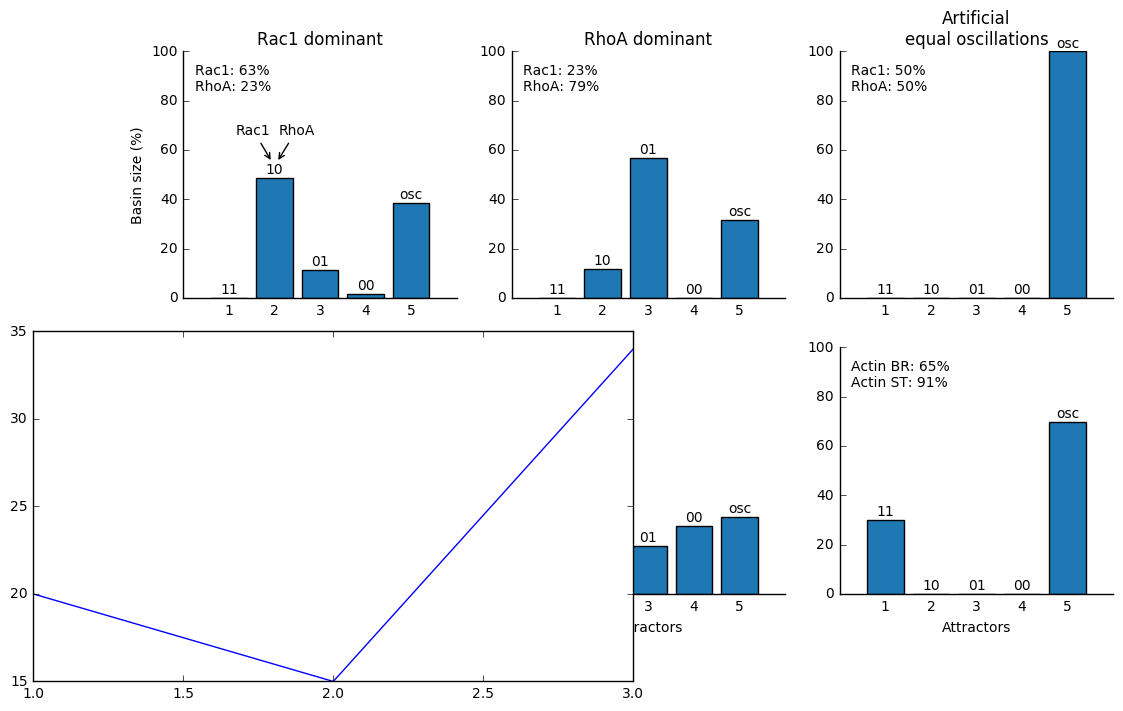

In [137]:
def get_activity(report):
    import csv
    reader = csv.reader(open('reports/{}/base/weighted_activity.csv'.format(report), 'r'))
    act = {}
    for data in reader:        
        act[data[0]] = data[1]
        
    return act

titles = ['Rac1 dominant', 'RhoA dominant', 'Artificial\nequal oscillations']
activities = [get_activity(report) for report in reports]
data = {}

for idx, file in enumerate(files):
    with open(file, 'r') as file:
        data_a, data_r, _ = file.read().split("\n\n\n\n")
        
    nm, basins, values = parse_raw_basins(data_r)     
    bt, vt = transform_basins(basins, values)






fig, axes = pl.subplots(2, 3, sharey=True, figsize = (12, 7))
for idx, file in enumerate(files):
    with open(file, 'r') as file:
        data_a, data_r, _ = file.read().split("\n\n\n\n")
        
    nm, basins, values = parse_raw_basins(data_r) 
    
    bt, vt = transform_basins(basins, values)
    plot_basins(data_r, axes[0, idx], bt, vt)   
    axes[0, idx].set_title(titles[idx], y=1.0)
    axes[0, idx].set_xlim((0, 6))
    axes[0, idx].text(0.25, 95, 
                      'Rac1: {}%\nRhoA: {}%'.format(activities[idx]['Rac1'], activities[idx]['RhoA']), 
                      horizontalalignment='left',
                      verticalalignment='top')
    
    nm, basins, values = parse_raw_basins(data_a)    
    bt, vt = transform_basins(basins, values)
    plot_basins(data_a, axes[1, idx], bt, vt)
    axes[1, idx].set_xlabel('Attractors')
    axes[1, idx].set_xlim((0, 6))
    
    axes[1, idx].text(0.25, 95, 
                      'Actin BR: {}%\nActin ST: {}%'.format(activities[idx]['Actin_BR'], activities[idx]['Actin_ST']), 
                      horizontalalignment='left',
                      verticalalignment='top')

axes[0, 0].set_ylabel('Basin size (%)')
axes[1, 0].set_ylabel('Basin size (%)')
      
add_annotation(axes[0,0], ('Rac1', 'RhoA'), 2, 55)
add_annotation(axes[1,0], ('BR', 'ST'), 1, 55)


# axes[0, 0].axes([.65, .6, .2, .2])
pl.axes([0, 0, .5, .5])
pl.plot([1, 2, 3], [20, 15, 34])

# fig.savefig('charts/fig_2_d.svg', bbox_inches='tight')
# fig.savefig('charts/fig_2_d.eps', bbox_inches='tight')
# fig.savefig('charts/fig_2_d.png', bbox_inches='tight', dpi=300)